In [14]:
# --------- IMPORTING LIBRARIES -------- #
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
plt.style.use('ggplot')
from scipy import stats

In [15]:
# ------------ Get File Location ----------- #
import os
for dirname, _, filenames in os.walk('C:/Users/anisu/Projects'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/anisu/Projects\archive.zip
C:/Users/anisu/Projects\homeprice.csv
C:/Users/anisu/Projects\RegExp.ipynb
C:/Users/anisu/Projects\Regression.ipynb
C:/Users/anisu/Projects\Titanic_DataSet.csv
C:/Users/anisu/Projects\Titanic_DS.ipynb
C:/Users/anisu/Projects\.git\COMMIT_EDITMSG
C:/Users/anisu/Projects\.git\config
C:/Users/anisu/Projects\.git\description
C:/Users/anisu/Projects\.git\HEAD
C:/Users/anisu/Projects\.git\index
C:/Users/anisu/Projects\.git\hooks\applypatch-msg.sample
C:/Users/anisu/Projects\.git\hooks\commit-msg.sample
C:/Users/anisu/Projects\.git\hooks\fsmonitor-watchman.sample
C:/Users/anisu/Projects\.git\hooks\post-update.sample
C:/Users/anisu/Projects\.git\hooks\pre-applypatch.sample
C:/Users/anisu/Projects\.git\hooks\pre-commit.sample
C:/Users/anisu/Projects\.git\hooks\pre-merge-commit.sample
C:/Users/anisu/Projects\.git\hooks\pre-push.sample
C:/Users/anisu/Projects\.git\hooks\pre-rebase.sample
C:/Users/anisu/Projects\.git\hooks\pre-receive.sample
C:/Users/anisu/Projec

In [16]:
# ---------- Load Titanic dataset & Display Data ----------#
pd.read_csv('C:/Users/anisu/Projects\Titanic_DataSet.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
# ----- Load Data and Send to df variable ------------- #
df = pd.read_csv('C:/Users/anisu/Projects\Titanic_DataSet.csv')

In [18]:
# --------- Show Coloumn Name ---------- #
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [19]:
# ------------ Display all the column names and Type ----------- #
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
# -------- Display all passenger names --------------#
df['Name'].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [12]:
# -------- More information about the dataset -------------#
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# ----------- Describe header data ----------#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# ---------- Describe the tail of the data --------#
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
# ---- Display Data Frequency ----- #
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [23]:
# ------- If it survives, it gets a value of 1 ----- #
df[df['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [24]:
# Case of gender dependence
df[df['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [26]:
# ------ Display Unique Value ------ #
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [27]:
df.groupby(by='Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,1098.224299,0.467290,40.918367,0.476636,0.383178,94.280297
2,1117.935484,0.322581,28.777500,0.376344,0.344086,22.202104
3,1094.178899,0.330275,24.027945,0.463303,0.417431,12.459678


In [29]:
# Correlation between Pclass and Survived
# Survived based on Pclass
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [30]:
#Age-specific survival probability
df['Survived'].corr(df['Age'])

-1.2682357097204818e-05

In [31]:
df[(df['Sex']=='female') & (df['Survived']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [32]:
#Dummy variables were created, 1 if female and 0 if male
df.loc[df['Sex']=='Female', 'Dummy'] = 1
df.loc[df['Sex']=='male', 'Dummy'] = 0

In [33]:
df['Cabin'].unique()
df['Cabin'].nunique()

76

In [34]:
#Create a group
df.groupby(by = 'Cabin').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy
Cabin,,,,,,,,,,,,
A11,1,1,1,1,1,1,1,1,1,1,1,0
A18,1,1,1,1,1,1,1,1,1,1,1,1
A21,1,1,1,1,1,1,1,1,1,1,1,1
A29,1,1,1,1,1,1,1,1,1,1,1,0
A34,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
F G63,1,1,1,1,1,1,1,1,1,1,1,1
F2,1,1,1,1,1,1,1,1,1,1,1,1
F33,1,1,1,1,1,1,1,1,1,1,1,0


In [35]:
df.groupby(by = 'Cabin').count().reset_index().sort_values(by='PassengerId', ascending = False)

,Cabin,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy
15,B57 B59 B63 B66,3,3,3,3,3,3,3,3,3,3,3,2
38,C6,2,2,2,2,2,2,2,2,2,2,2,2
12,B45,2,2,2,2,2,2,2,2,2,2,2,1
41,C78,2,2,2,2,2,2,2,2,2,2,2,1
45,C89,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,C51,1,1,1,1,1,1,1,1,1,1,1,1
35,C53,1,1,1,1,1,1,1,1,1,1,1,1
36,C54,1,1,1,1,1,1,1,1,1,1,1,0
1,A18,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
df = df.groupby(by = 'Cabin').count().reset_index().sort_values(by='PassengerId', ascending = False)

In [37]:
df['Survived'].mean()

1.1973684210526316

In [38]:
#to make it easier to store data in TC format
TC = df.groupby(by = 'Cabin').count().reset_index().sort_values(by='PassengerId', ascending = False)

In [39]:
TC['PassengerId'].sum()

76

Total Null Entries in training samples : 0
Total Null Entries in testing samples  : 0


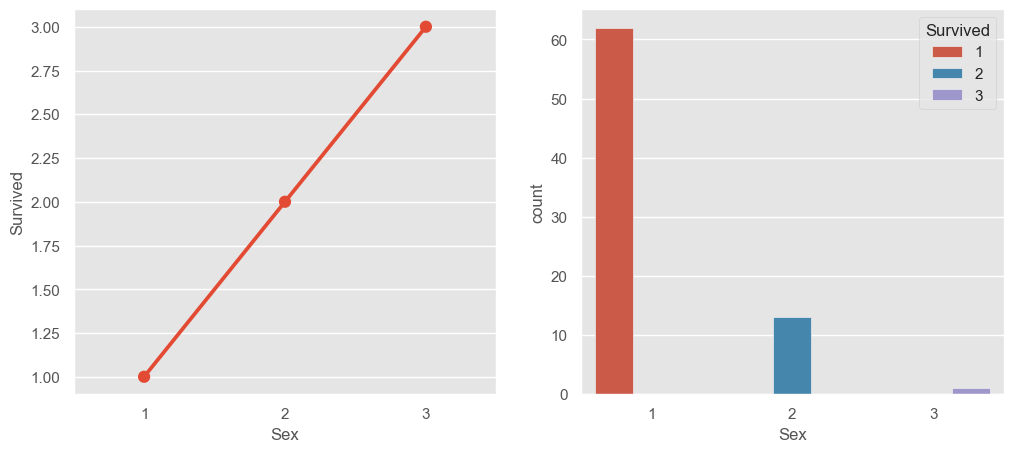

In [40]:
#Feature - Sex

#Number of null values
print("Total Null Entries in training samples :", df['Sex'].isnull().sum())
print("Total Null Entries in testing samples  :", df['Sex'].isnull().sum())

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=df, x="Sex", y="Survived", ax=ax1)
sns.countplot(data=df, x="Sex", hue="Survived", ax=ax2)

#Map to integer data
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1})
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1})

In [41]:
df.Age.describe().to_frame()

,Age
count,76.000000
mean,1.144737
std,0.508696
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


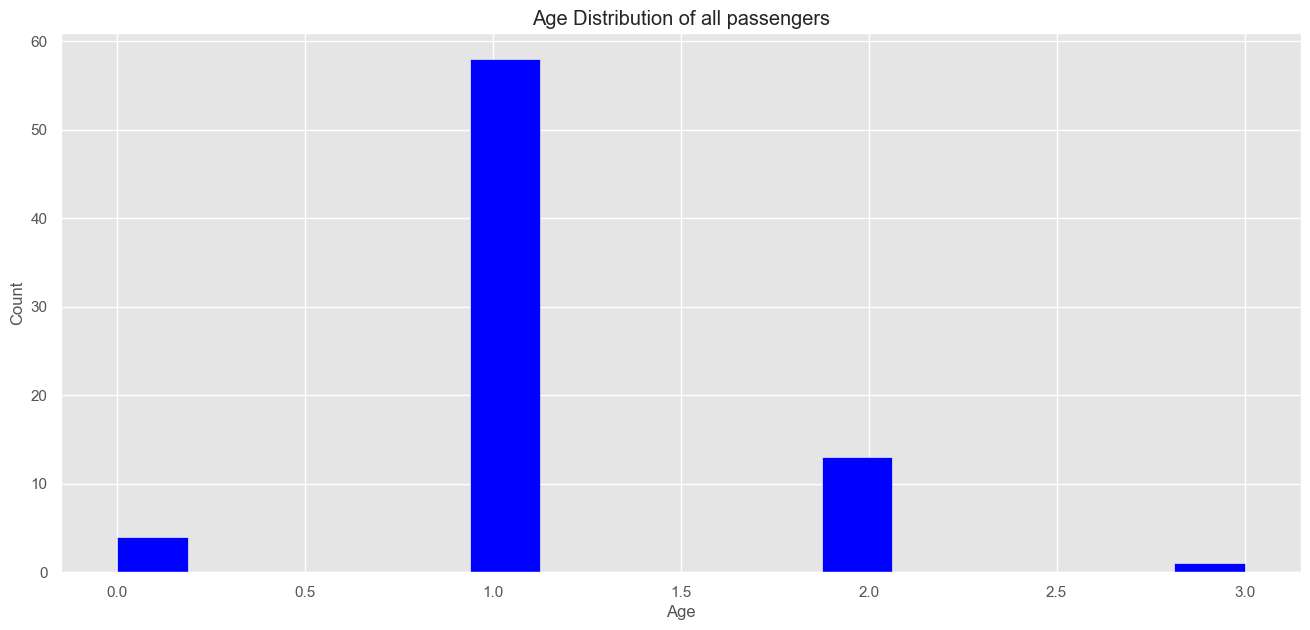

In [42]:
#Histogram
df['Age'].hist(bins=16, color='blue' ,figsize=(16,7))
plt.title('Age Distribution of all passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

In [43]:
#Exploratory data analysis 
TC.describe(include='all')

,Cabin,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy
count,76,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
unique,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot: >

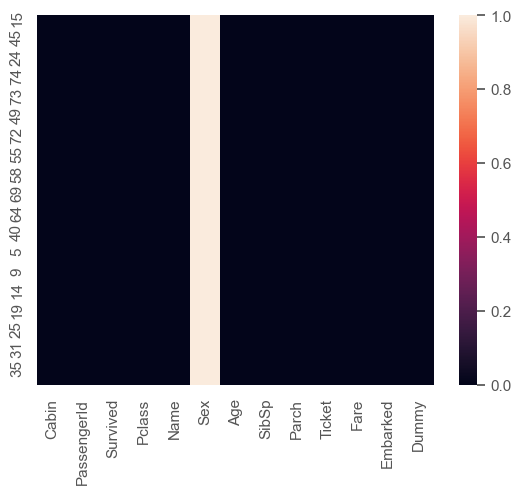

In [44]:
#visualization of missing data
sns.heatmap(df.isnull())

In [45]:
#Viewing the missing values in the dataset
df["Embarked"] = df["Embarked"].fillna("S")

In [46]:
#Checking and counting the value of the "Embark" colum
df['Embarked'].value_counts()

1    62
2    13
3     1
Name: Embarked, dtype: int64

In [47]:
df[pd.isnull(df.Embarked)]


,Cabin,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy


In [48]:
#Amount and average age of people who survived compared to those who died
df.groupby(['Survived']).Age.agg([len,min, max,'mean'])

,len,min,max,mean
Survived,,,,
1,62,0,1,0.935484
2,13,2,2,2.000000
3,1,3,3,3.000000


In [49]:
df['Pclass'].value_counts()

1    62
2    13
3     1
Name: Pclass, dtype: int64

In [50]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])


,,len
Pclass,Survived,
1,1,62
2,2,13
3,3,1


In [51]:
#Number and average age of survivors compared to those who died
df.groupby(['Survived']).Age.agg([len,min, max,'mean'])

,len,min,max,mean
Survived,,,,
1,62,0,1,0.935484
2,13,2,2,2.000000
3,1,3,3,3.000000


In [52]:
#Amount and average age of women and men who survived compared to those who died
df.groupby(['Sex','Survived']).Age.agg([len,'mean', 'median'])

,,len,mean,median
Sex,Survived,,,


In [53]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])


,,len
Pclass,Survived,
1,1,62
2,2,13
3,3,1


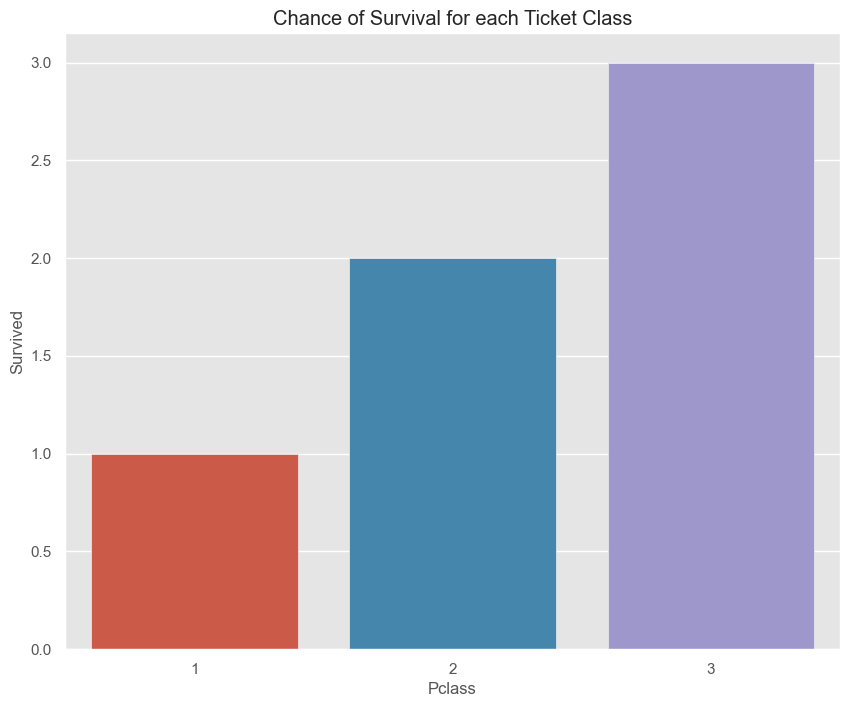

In [54]:
#Compare the chances of survival for each ticket category
plt.figure(figsize=(10,8))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class")
plt.show()